## 1. Import Required Libraries

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
from tqdm import tqdm

# Model library
import segmentation_models_pytorch as smp

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    jaccard_score
)


## 2. Configuration

In [ ]:
# Input image and mask directories (with .npy patches)
image_dir = r"C:\nrsc_test\npy_patches\images"
mask_dir = r"C:\nrsc_test\npy_patches\masks"

# Directory to save trained model checkpoints
save_dir = "./resunet_checkpoints"
os.makedirs(save_dir, exist_ok=True)

# Training hyperparameters
batch_size = 16
epochs = 10


## 3. Custom Dataset for .npy Patches

In [ ]:
class NPYPatchDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([
            os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")
        ])
        self.mask_paths = sorted([
            os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")
        ])
        assert len(self.image_paths) == len(self.mask_paths)
        print(f"✅ Loaded {len(self.image_paths)} image-mask pairs")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])   # Shape: (3, 128, 128)
        mask = np.load(self.mask_paths[idx])     # Shape: (128, 128)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(mask, dtype=torch.long)


## 4. Data Loading and Splitting

In [ ]:
dataset = NPYPatchDataset(image_dir, mask_dir)
total = len(dataset)

# 70% train, 15% val, 15% test
train_len = int(0.7 * total)
val_len = int(0.15 * total)
test_len = total - train_len - val_len

train_ds, val_ds, test_ds = random_split(dataset, [train_len, val_len, test_len])
print(f"📊 Split: {train_len} train, {val_len} val, {test_len} test")

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=0)


## 5. Define ResUNet Model (with pretrained encoder)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = smp.Unet(
    encoder_name="resnet34",         # Pretrained encoder
    encoder_weights="imagenet",      # Load ImageNet weights
    in_channels=3,                   # Input channels (RGB)
    classes=2,                       # Output: 2 classes (clear/cloud)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


## 6. Training Loop with Validation along with Plot Training & Validation Loss Curve

✅ Loaded 204554 image-mask pairs
📊 Split: 143187 train, 30683 val, 30684 test

🚀 Epoch 1/10


🧪 Validation: 100%|██████████| 1918/1918 [10:36<00:00,  3.01it/s]


📉 Train Loss: 0.1377 | Val Loss: 0.0927
💾 Model saved: ./resunet_checkpoints\resunet_epoch1.pth

🚀 Epoch 2/10


🧪 Validation: 100%|██████████| 1918/1918 [10:16<00:00,  3.11it/s]


📉 Train Loss: 0.0983 | Val Loss: 0.0694
💾 Model saved: ./resunet_checkpoints\resunet_epoch2.pth

🚀 Epoch 3/10


🧪 Validation: 100%|██████████| 1918/1918 [10:25<00:00,  3.07it/s]


📉 Train Loss: 0.0838 | Val Loss: 0.0736
💾 Model saved: ./resunet_checkpoints\resunet_epoch3.pth

🚀 Epoch 4/10


🧪 Validation: 100%|██████████| 1918/1918 [10:21<00:00,  3.09it/s]


📉 Train Loss: 0.0766 | Val Loss: 0.0603
💾 Model saved: ./resunet_checkpoints\resunet_epoch4.pth

🚀 Epoch 5/10


🧪 Validation: 100%|██████████| 1918/1918 [10:23<00:00,  3.07it/s]


📉 Train Loss: 0.0696 | Val Loss: 0.0508
💾 Model saved: ./resunet_checkpoints\resunet_epoch5.pth

🚀 Epoch 6/10


🧪 Validation: 100%|██████████| 1918/1918 [09:30<00:00,  3.36it/s]


📉 Train Loss: 0.0660 | Val Loss: 0.0494
💾 Model saved: ./resunet_checkpoints\resunet_epoch6.pth

🚀 Epoch 7/10


🧪 Validation: 100%|██████████| 1918/1918 [10:34<00:00,  3.02it/s]


📉 Train Loss: 0.0624 | Val Loss: 0.0559
💾 Model saved: ./resunet_checkpoints\resunet_epoch7.pth

🚀 Epoch 8/10


🧪 Validation: 100%|██████████| 1918/1918 [10:29<00:00,  3.05it/s]


📉 Train Loss: 0.0591 | Val Loss: 0.0501
💾 Model saved: ./resunet_checkpoints\resunet_epoch8.pth

🚀 Epoch 9/10


🧪 Validation: 100%|██████████| 1918/1918 [09:52<00:00,  3.24it/s]


📉 Train Loss: 0.0557 | Val Loss: 0.0467
💾 Model saved: ./resunet_checkpoints\resunet_epoch9.pth

🚀 Epoch 10/10


🧪 Validation: 100%|██████████| 1918/1918 [10:03<00:00,  3.18it/s]


📉 Train Loss: 0.0526 | Val Loss: 0.0975
💾 Model saved: ./resunet_checkpoints\resunet_epoch10.pth


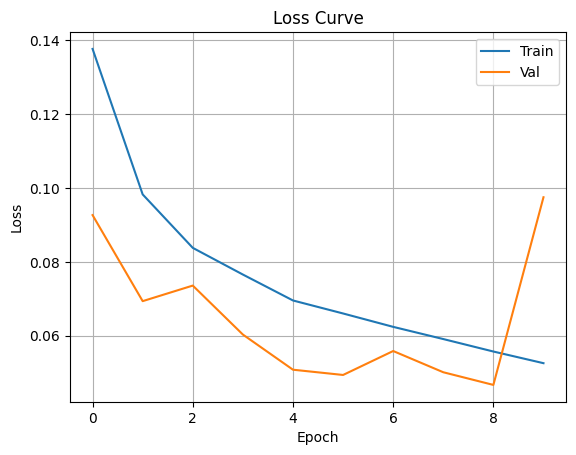


📈 Evaluating on Test Set...


🧪 Testing: 100%|██████████| 1918/1918 [10:04<00:00,  3.17it/s]



📊 Classification Report:
              precision    recall  f1-score   support

       clear       1.00      0.93      0.96 273910491
       cloud       0.92      0.99      0.96 228816165

    accuracy                           0.96 502726656
   macro avg       0.96      0.96      0.96 502726656
weighted avg       0.96      0.96      0.96 502726656

📉 Confusion Matrix:
[[254954950  18955541]
 [  1276594 227539571]]
🔁 Precision: 0.9230997286469518
🎯 Recall: 0.9944208749412438
🔥 F1 Score: 0.9574339259785751
📐 IoU (Jaccard): 0.9183436425142102


In [ ]:
# === Training Loop ===
train_losses, val_losses = [], []

for epoch in range(epochs):
    print(f"\n🚀 Epoch {epoch+1}/{epochs}")
    
    # --- Train ---
    model.train()
    train_loss = 0
    for images, masks in tqdm(train_loader, desc="🔧 Training"):
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- Validate ---
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, masks in tqdm(val_loader, desc="🧪 Validation"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"📉 Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # --- Save Model ---
    model_path = os.path.join(save_dir, f"resunet_epoch{epoch+1}.pth")
    torch.save(model.state_dict(), model_path)
    print(f"💾 Model saved: {model_path}")

# === Plot Loss ===
plt.plot(train_losses, label="Train")
plt.plot(val_losses, label="Val")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# === Test Evaluation ===
print("\n📈 Evaluating on Test Set...")
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for images, masks in tqdm(test_loader, desc="🧪 Testing"):
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = masks.numpy()

        all_preds.append(preds)
        all_labels.append(labels)

# Flatten
y_pred = np.concatenate([p.flatten() for p in all_preds])
y_true = np.concatenate([l.flatten() for l in all_labels])

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["clear", "cloud"]))
print("📉 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("🔁 Precision:", precision_score(y_true, y_pred))
print("🎯 Recall:", recall_score(y_true, y_pred))
print("🔥 F1 Score:", f1_score(y_true, y_pred))
print("📐 IoU (Jaccard):", jaccard_score(y_true, y_pred))


## Testing on model after 9th epoch(the best results are achieved)

In [3]:
# === Load 9th epoch model before test ===
model_path = os.path.join(save_dir, "resunet_epoch9.pth")
model.load_state_dict(torch.load(model_path))
model.eval()
print(f"✅ Loaded model from: {model_path}")

# === Test Evaluation ===
print("\n📈 Evaluating on Test Set...")
all_preds, all_labels = [], []

with torch.no_grad():
    for images, masks in tqdm(test_loader, desc="🧪 Testing"):
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = masks.numpy()

        all_preds.append(preds)
        all_labels.append(labels)

# Flatten
y_pred = np.concatenate([p.flatten() for p in all_preds])
y_true = np.concatenate([l.flatten() for l in all_labels])

# === Print metrics ===
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["clear", "cloud"]))
print("📉 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("🔁 Precision:", precision_score(y_true, y_pred))
print("🎯 Recall:", recall_score(y_true, y_pred))
print("🔥 F1 Score:", f1_score(y_true, y_pred))
print("📐 IoU (Jaccard):", jaccard_score(y_true, y_pred))


C:\Users\devka\AppData\Local\Temp\ipykernel_14976\2094322893.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


✅ Loaded model from: ./resunet_checkpoints\resunet_epoch9.pth

📈 Evaluating on Test Set...


🧪 Testing: 100%|██████████| 1918/1918 [09:17<00:00,  3.44it/s]



📊 Classification Report:
              precision    recall  f1-score   support

       clear       0.98      0.99      0.98 273910491
       cloud       0.98      0.98      0.98 228816165

    accuracy                           0.98 502726656
   macro avg       0.98      0.98      0.98 502726656
weighted avg       0.98      0.98      0.98 502726656

📉 Confusion Matrix:
[[270251321   3659170]
 [  4638811 224177354]]
🔁 Precision: 0.9839394933886895
🎯 Recall: 0.9797269087173103
🔥 F1 Score: 0.9818286824979148
📐 IoU (Jaccard): 0.9643059725024162
